In [ ]:
#df をエクセルファイルに書き出す
import pandas as pd
import numpy as np
import openpyxl


参考文献　https://qiita.com/chicken_data_analyst/items/76cbbc403293e1f4a53c

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.font_manager as fm
import matplotlib.font_manager as font_manager
from matplotlib.markers import TICKLEFT, TICKRIGHT, TICKUP, TICKDOWN, CARETLEFT, CARETRIGHT, CARETUP, CARETDOWN
from mpl_toolkits.mplot3d import axes3d, Axes3D
import sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.covariance import GraphicalLassoCV, GraphicalLasso
import scipy
import functools
import seaborn as sns
import glob
import datetime as dt
import gc
import sys
import tqdm as tq
from tqdm import tqdm
import time
import pickle
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import collections
# jpn_fonts=list(np.sort([ttf for ttf in fm.findSystemFonts() if 'ipaexg' in ttf or 'msgothic' in ttf or 'japan' in ttf or 'ipafont' in ttf]))
# jpn_font=jpn_fonts[0]
# prop = font_manager.FontProperties(fname=jpn_font)
# print(jpn_font)
# sns.set()

# import warnings
# warnings.simplefilter('ignore')

In [2]:
!pip install lingam

In [3]:
import graphviz
import lingam
from lingam.utils import make_dot
from lingam.utils import print_causal_directions, print_dagc

In [4]:
df_all = pd.read_csv('all.csv',encoding='shift-jis')
df_all

,Unnamed: 0,x,d1,d2,d3,d4,d5,w1,w2,w3,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,0,1,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,...,29,21,10,6,3,1.6111,3.1556,3.7000,3.6667,3.5000
1,1,2,11.0338,6.1047,7.2883,7.54295,9.90751,25.40064,16.89495,16.52988,...,14,8,12,21,3,3.0000,3.0000,3.0000,3.0000,3.0000
2,2,3,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,...,18,16,18,15,4,2.4667,2.4667,2.7333,2.6222,3.4222
3,3,4,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,...,28,16,17,11,4,2.2778,3.3778,3.9000,3.2889,3.7889
4,4,5,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,...,23,24,24,23,5,1.4444,4.4111,4.5778,4.1778,4.6889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,799,800,7.5822,0.1201,6.5722,3.32963,4.75933,22.04394,17.21857,11.89841,...,33,19,18,11,4,2.0000,4.3000,4.5000,4.5000,4.5000
800,800,801,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,...,33,18,24,10,4,2.4667,4.0556,4.2778,3.7778,4.0333
801,801,802,6.0455,2.0958,3.8635,4.97563,5.69270,28.18144,19.74430,19.20815,...,14,16,11,21,2,3.3778,3.2333,3.5333,3.5333,3.5333
802,802,803,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,...,28,26,17,6,4,1.8444,4.6111,4.2444,4.0222,4.3333


In [5]:
df_all = df_all[['d1', 'd2', 'd3', 'd4', 'd5', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s']]

In [6]:
df_all.describe()

,d1,d2,d3,d4,d5,none_s,image_s,announce_s,image_sound_s,image_announce_s
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,6.211799,0.466710,4.467479,3.693894,5.667706,2.470222,3.460710,3.630446,3.421447,3.697470
std,2.279954,1.516064,1.630418,1.083217,1.259899,0.631644,0.628856,0.642970,0.663882,0.629797
min,-0.753800,-2.851000,0.844100,1.677050,2.625490,1.000000,1.200000,1.377800,1.222200,1.633300
25%,4.504200,-0.634875,3.322100,2.850433,4.835517,2.000000,3.000000,3.055600,3.000000,3.155600
50%,6.227950,0.224250,4.285100,3.524790,5.535405,2.466700,3.361150,3.600000,3.288900,3.677800
75%,7.813150,1.364100,5.554050,4.263863,6.400317,3.000000,3.880575,4.113875,3.902775,4.177800
max,11.550000,6.520000,8.276300,7.542950,9.907510,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
colsname = df_all.columns
colsname

Index(['d1', 'd2', 'd3', 'd4', 'd5', 'none_s', 'image_s', 'announce_s',
       'image_sound_s', 'image_announce_s'],
      dtype='object')

In [8]:
# df_sampleを標準化
df_std = df_all.copy()
ss = sklearn.preprocessing.StandardScaler()
df_std = pd.DataFrame(ss.fit_transform(df_std), columns=colsname)
display(df_std)

,d1,d2,d3,d4,d5,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,0.035945,0.972259,1.408073,-0.567159,0.042771,-1.360982,-0.485485,0.108243,0.369652,-0.313740
1,2.116272,3.721150,1.731198,3.555570,3.367288,0.839251,-0.733073,-0.981133,-0.635218,-1.108142
2,0.430716,1.080238,0.307426,1.821384,2.158360,-0.005579,-1.581649,-1.396185,-1.204649,-0.437349
3,0.740081,-0.952010,-0.111501,0.135049,-0.627644,-0.304826,-0.131925,0.419493,-0.199779,0.145265
4,1.542132,-0.285000,1.657367,0.196885,0.503714,-1.625060,1.512241,1.474320,1.139996,1.575187
...,...,...,...,...,...,...,...,...,...,...
799,0.601440,-0.228767,1.291712,-0.336489,-0.721440,-0.744904,1.335461,1.353244,1.625626,1.275062
800,-0.261966,-0.790769,-1.711042,0.043810,-0.052049,-0.005579,0.946576,1.007445,0.537105,0.533568
801,-0.072985,1.075221,-0.370675,1.184005,0.019851,1.437745,-0.361851,-0.151184,0.168587,-0.260833
802,1.080519,-0.586297,-1.864718,0.536825,-0.138864,-0.991398,1.830477,0.955466,0.905472,1.010209


In [9]:
%%time
# DirectLiNGAM
print(time.ctime())
model = lingam.DirectLiNGAM()
model.fit(df_std)
print(time.ctime())

# DAGを保存するなら実行
save_pickle = 'pickles'
os.makedirs(save_pickle, exist_ok=True)
#with open(save_pickle+'/model_DLingam.pickle', mode='wb') as f:
#    pickle.dump(model, f)

Thu May 30 13:43:41 2024
Thu May 30 13:43:41 2024
CPU times: user 60 ms, sys: 1.42 ms, total: 61.4 ms
Wall time: 61.2 ms


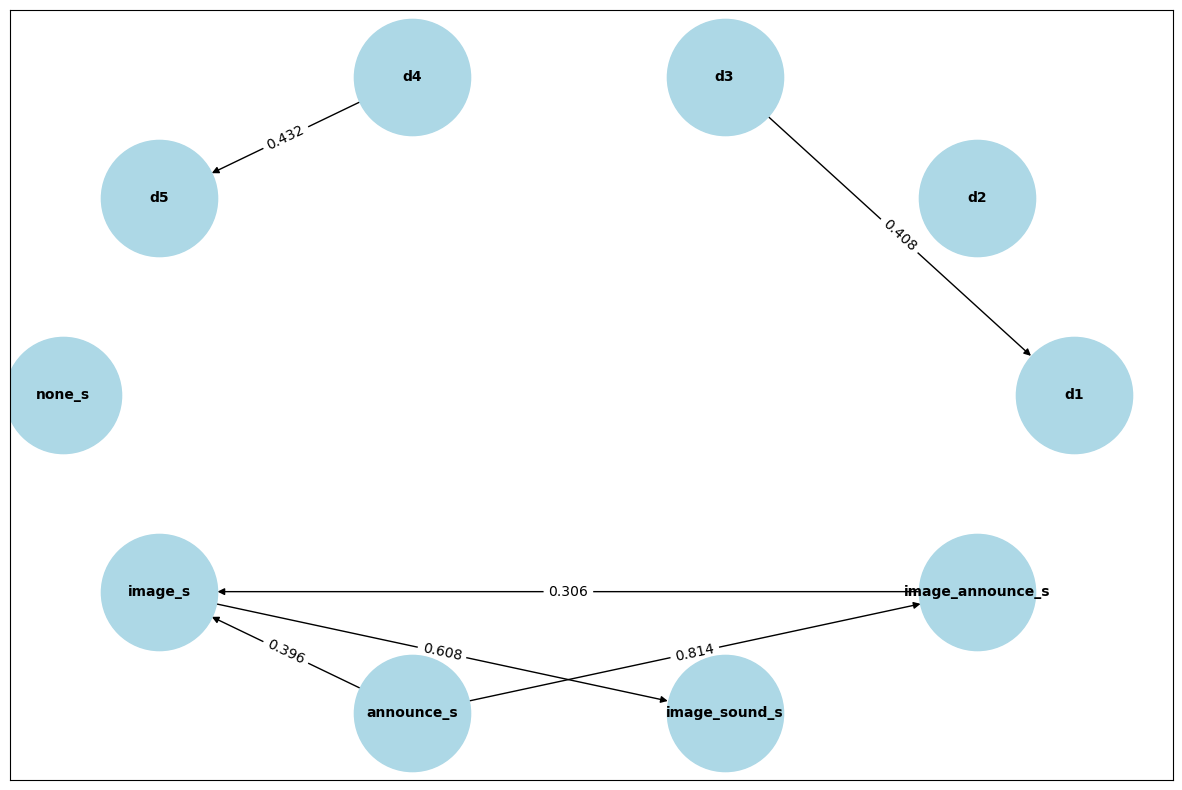

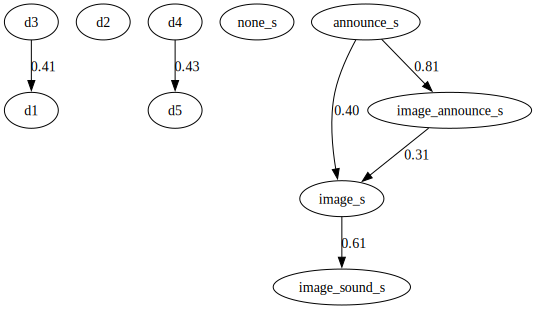

In [10]:
# 隣接行列の取得
adjacency_matrix = model.adjacency_matrix_

# フィルタリング
threshold = 0.30
filtered_adjacency_matrix = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)

# 有向グラフの作成
G = nx.from_numpy_array(filtered_adjacency_matrix.T, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(colsname)))

# エッジラベルの作成
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True) if np.abs(d['weight']) > threshold}

# グラフの描画
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)
plt.show()

# make_dotを用いた可視化
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

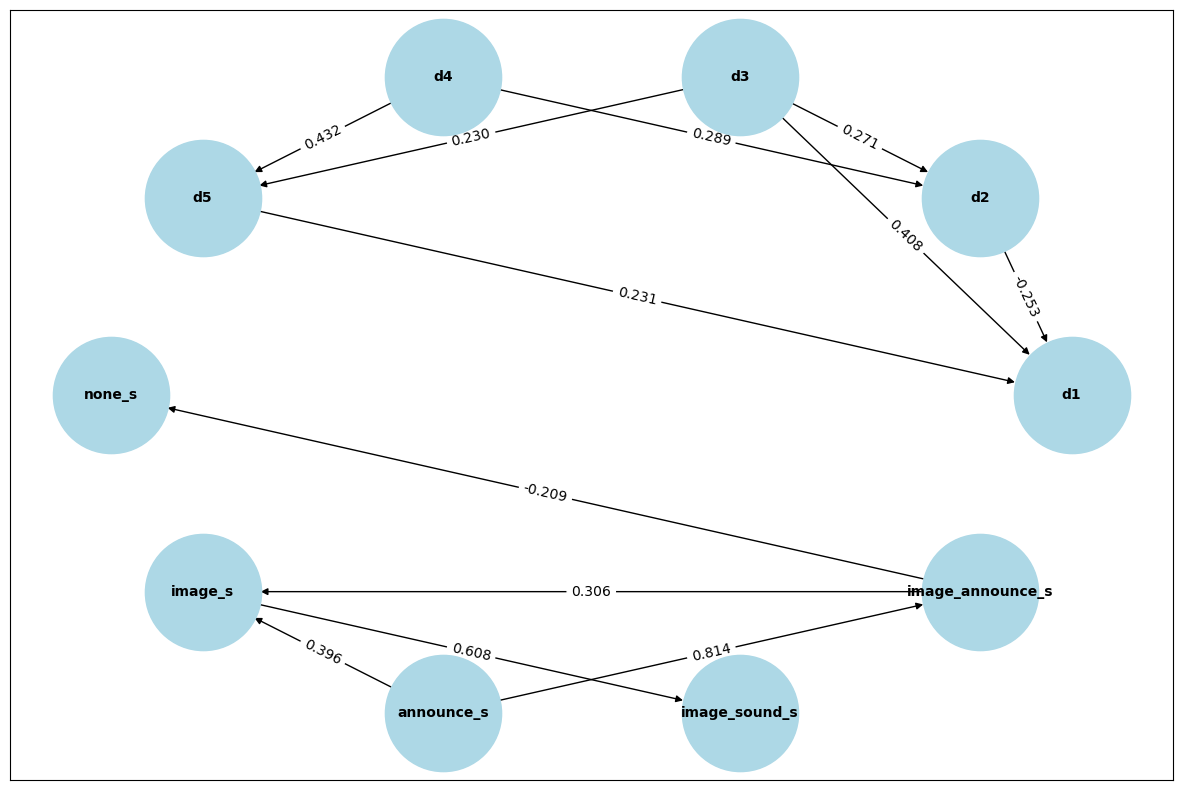

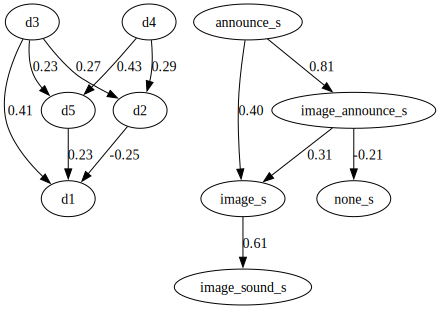

In [11]:
# 隣接行列の取得
adjacency_matrix = model.adjacency_matrix_

# フィルタリング
threshold = 0.20
filtered_adjacency_matrix = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)

# 有向グラフの作成
G = nx.from_numpy_array(filtered_adjacency_matrix.T, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(colsname)))

# エッジラベルの作成
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True) if np.abs(d['weight']) > threshold}

# グラフの描画
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)
plt.show()

# make_dotを用いた可視化
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

<Figure size 1500x1000 with 0 Axes>

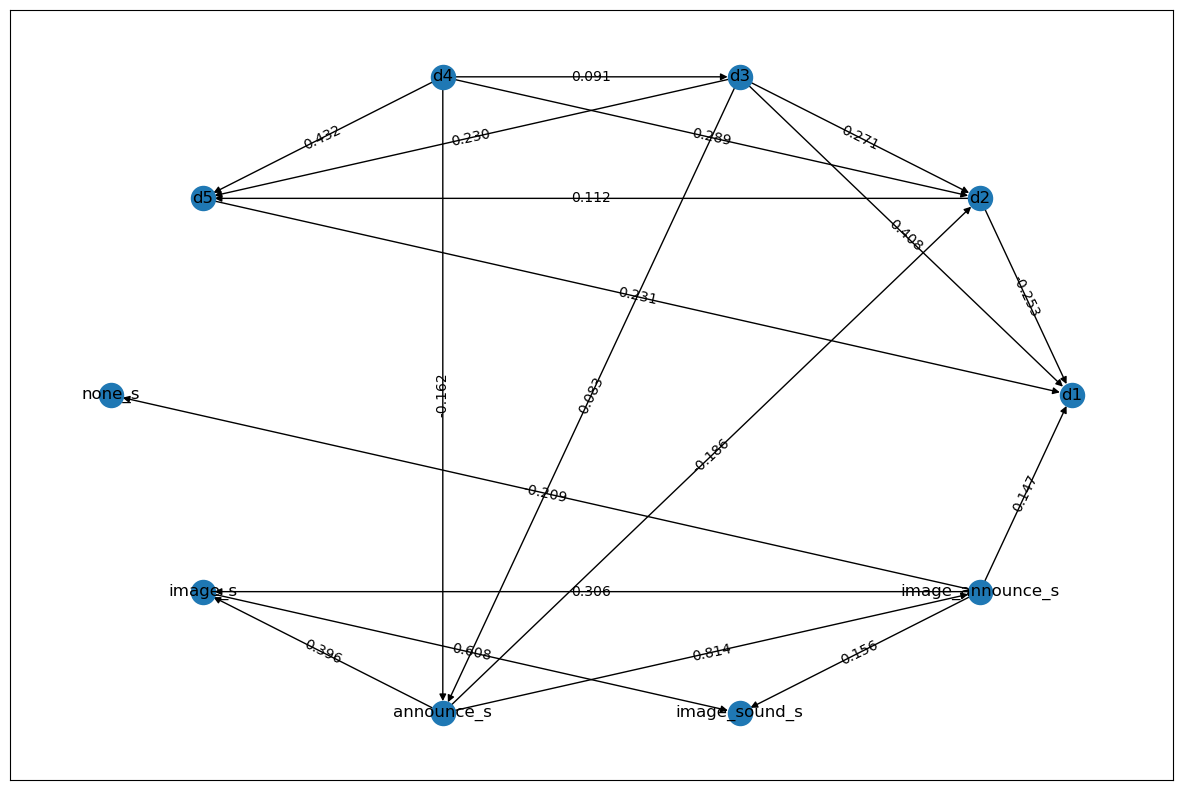

In [12]:
# 想定される因果
G = nx.DiGraph()  # 有向グラフ (Directed Graph)
# 頂点の追加
#G.add_node('Air temperature [K]')                
G.add_nodes_from(colsname)

# 隣接行列を有向グラフで可視化(networkx使用)
plt.figure(figsize=(15,10))
pos = nx.circular_layout(G, scale=1, center=None, dim=2)  # ここのポジションをこの先のplotでも使用する
# #pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
# nx.draw_networkx(G, pos)
# plt.grid(False)
# plt.show()
adjacency_ = pd.DataFrame(model.adjacency_matrix_, columns=colsname, index=colsname)
G=nx.from_pandas_adjacency(adjacency_.T, create_using=nx.DiGraph)  # 列が原因、行が結果なのでnetworkxでは転置の必要がある
plt.figure(figsize=(15,10))
#pos = nx.bipartite_layout(G, colsname[:5])
#pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
edge_labels = dict([((u,v,), f"{d['weight']:.3f}") for u,v,d in G.edges(data=True)])#nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw_networkx(G, pos)
plt.grid(False)
plt.show()

[3, 2, 7, 9, 6, 8, 5, 1, 4, 0]
['d4' 'd3' 'announce_s' 'image_announce_s' 'image_s' 'image_sound_s'
 'none_s' 'd2' 'd5' 'd1']


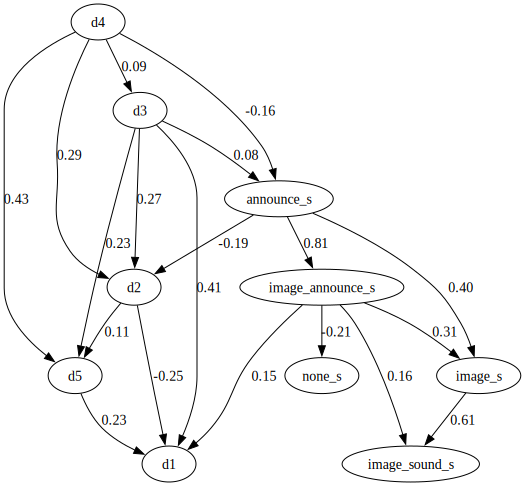

In [13]:
# 隣接行列を有向グラフで可視化(make_dot使用)
print(model.causal_order_)
print(np.array(colsname)[model.causal_order_])
#print(model.adjacency_matrix_)
make_dot(model.adjacency_matrix_, labels=list(colsname))

ブートストラップ法　参考URL https://qiita.com/ts5129nk/items/03d6a73c36ecedad2535

In [14]:
# #ブートストラップ実行
# result = model.bootstrap(x, n_sampling=100)
# #結果の表示
# causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)

# df_b = pd.DataFrame(causal_effects)
# df_b['from'] = df_b['from'].apply(lambda x : colsname[x])
# df_b['to'] = df_b['to'].apply(lambda x : colsname[x])
# #効果の降順でソート
# df_b=df_b.sort_values('effect', ascending=False)
# df_b

In [15]:
%%time
# DirectLiNGAM bootstrap
print(time.ctime())
n_sampling = 100
model = lingam.DirectLiNGAM()
result = model.bootstrap(df_std, n_sampling=n_sampling)
print(time.ctime())

# DAGを保存するなら実行
save_pickle = 'pickles'
os.makedirs(save_pickle, exist_ok=True)
#with open(save_pickle+'/model_DLingam_bootstrap.pickle', mode='wb') as f:
#    pickle.dump(model, f)

Thu May 30 13:43:43 2024
Thu May 30 13:43:49 2024
CPU times: user 6.11 s, sys: 18.9 ms, total: 6.13 s
Wall time: 6.28 s


[3, 7, 6, 9, 8, 5, 1, 2, 4, 0]
['d4' 'announce_s' 'image_s' 'image_announce_s' 'image_sound_s' 'none_s'
 'd2' 'd3' 'd5' 'd1']


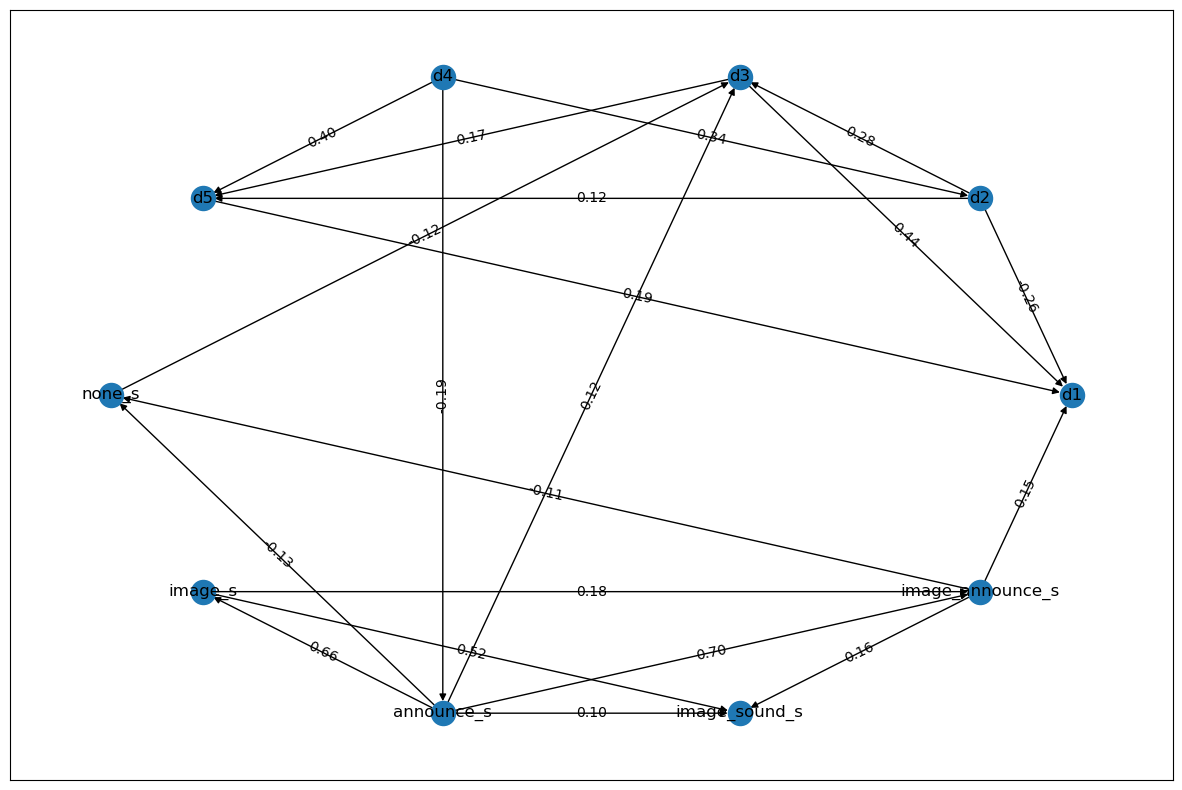

In [16]:
# 隣接行列を有向グラフで可視化(networkx使用)
print(model.causal_order_)
print(np.array(colsname)[model.causal_order_])
#print(model.adjacency_matrix_)

adjacency_ = pd.DataFrame(model.adjacency_matrix_, columns=colsname, index=colsname)
G=nx.from_pandas_adjacency(adjacency_.T, create_using=nx.DiGraph)  # 列が原因、行が結果なのでnetworkxでは転置の必要がある
plt.figure(figsize=(15,10))
#pos = nx.bipartite_layout(G, colsname[:5])
#pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
edge_labels = edge_labels = dict([((u,v,), f"{d['weight']:.2f}") for u,v,d in G.edges(data=True)])#nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw_networkx(G, pos)
plt.grid(False)
plt.show()

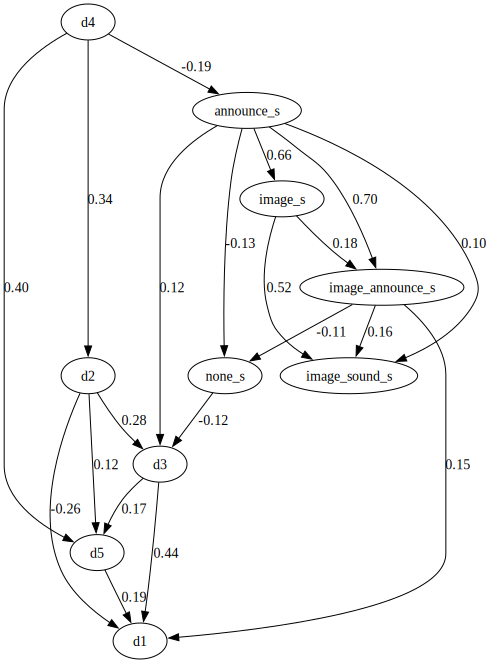

In [17]:
# 隣接行列を有向グラフで可視化(make_dot使用)
make_dot(model.adjacency_matrix_, labels=list(colsname))

In [18]:
%%time
# DirectLiNGAM bootstrap result
print(time.ctime())
dagc = result.get_directed_acyclic_graph_counts(n_dags=5, min_causal_effect=0.1, split_by_causal_effect_sign=True)
print_dagc(dagc, n_sampling)
print(time.ctime())

Thu May 30 13:43:49 2024
DAG[0]: 1.0%
	x0 <--- x1 (b<0)
	x0 <--- x2 (b>0)
	x0 <--- x9 (b>0)
	x1 <--- x3 (b>0)
	x1 <--- x7 (b<0)
	x2 <--- x1 (b>0)
	x2 <--- x7 (b>0)
	x4 <--- x0 (b>0)
	x4 <--- x1 (b>0)
	x4 <--- x2 (b>0)
	x4 <--- x3 (b>0)
	x5 <--- x7 (b<0)
	x6 <--- x7 (b>0)
	x6 <--- x8 (b>0)
	x6 <--- x9 (b>0)
	x7 <--- x3 (b<0)
	x8 <--- x7 (b>0)
	x8 <--- x9 (b>0)
	x9 <--- x7 (b>0)
DAG[1]: 1.0%
	x0 <--- x2 (b>0)
	x0 <--- x9 (b>0)
	x1 <--- x0 (b<0)
	x1 <--- x2 (b>0)
	x1 <--- x3 (b>0)
	x1 <--- x6 (b>0)
	x1 <--- x7 (b<0)
	x1 <--- x8 (b<0)
	x4 <--- x0 (b>0)
	x4 <--- x1 (b>0)
	x4 <--- x2 (b>0)
	x4 <--- x3 (b>0)
	x5 <--- x1 (b<0)
	x5 <--- x3 (b>0)
	x5 <--- x6 (b>0)
	x5 <--- x9 (b<0)
	x6 <--- x7 (b>0)
	x6 <--- x9 (b>0)
	x7 <--- x9 (b>0)
	x8 <--- x6 (b>0)
	x8 <--- x9 (b>0)
	x9 <--- x2 (b>0)
	x9 <--- x3 (b<0)
DAG[2]: 1.0%
	x0 <--- x2 (b>0)
	x0 <--- x9 (b>0)
	x1 <--- x0 (b<0)
	x1 <--- x2 (b>0)
	x1 <--- x3 (b>0)
	x1 <--- x6 (b>0)
	x1 <--- x7 (b<0)
	x1 <--- x8 (b<0)
	x1 <--- x9 (b<0)
	x2 <--- x3 (b>0)


In [19]:
%%time
# DirectLiNGAM bootstrap result
print(time.ctime())
cdc = result.get_causal_direction_counts(n_directions=10, min_causal_effect=0.1, split_by_causal_effect_sign=True)
print_causal_directions(cdc, n_sampling)
print(time.ctime())

Thu May 30 13:43:49 2024
x0 <--- x2 (b>0) (100.0%)
x4 <--- x3 (b>0) (97.0%)
x8 <--- x6 (b>0) (97.0%)
x1 <--- x3 (b>0) (93.0%)
x9 <--- x7 (b>0) (82.0%)
x6 <--- x7 (b>0) (81.0%)
x4 <--- x2 (b>0) (79.0%)
x1 <--- x2 (b>0) (71.0%)
x5 <--- x9 (b<0) (70.0%)
x4 <--- x1 (b>0) (67.0%)
Thu May 30 13:43:49 2024
CPU times: user 3.2 ms, sys: 1.2 ms, total: 4.41 ms
Wall time: 3.6 ms


In [20]:
%%time
# DirectLiNGAM bootstrap result
print(time.ctime())
prob = result.get_probabilities(min_causal_effect=0.1)
prob = np.where(prob<0.01, 0, prob)
prob = pd.DataFrame(prob, columns=colsname, index=colsname)
display(prob)
print(time.ctime())

Thu May 30 13:43:49 2024


,d1,d2,d3,d4,d5,none_s,image_s,announce_s,image_sound_s,image_announce_s
d1,0.00,0.60,1.00,0.11,0.53,0.00,0.08,0.37,0.02,0.51
d2,0.40,0.00,0.71,0.93,0.23,0.00,0.08,0.48,0.21,0.27
d3,0.00,0.29,0.00,0.31,0.11,0.02,0.02,0.19,0.02,0.02
d4,0.00,0.07,0.02,0.00,0.03,0.02,0.06,0.05,0.02,0.07
d5,0.47,0.67,0.79,0.97,0.00,0.00,0.00,0.01,0.01,0.01
none_s,0.00,0.01,0.05,0.28,0.03,0.00,0.41,0.41,0.11,0.70
image_s,0.00,0.00,0.00,0.12,0.00,0.04,0.00,0.81,0.03,0.56
announce_s,0.00,0.06,0.13,0.51,0.01,0.09,0.19,0.00,0.02,0.18
image_sound_s,0.00,0.01,0.00,0.01,0.00,0.01,0.97,0.37,0.00,0.62
image_announce_s,0.00,0.03,0.03,0.13,0.00,0.04,0.43,0.82,0.01,0.00


Thu May 30 13:43:49 2024
CPU times: user 4.05 ms, sys: 1.52 ms, total: 5.58 ms
Wall time: 5.14 ms


In [21]:
from_index = 0 # index of x0
to_index = 12 # index of x3
# 開始変数から終了変数までのすべてのパスとそのブートストラップ確率を取得
display(pd.DataFrame(result.get_paths(from_index, to_index)))
print(time.ctime())

,path,effect,probability


Thu May 30 13:43:49 2024


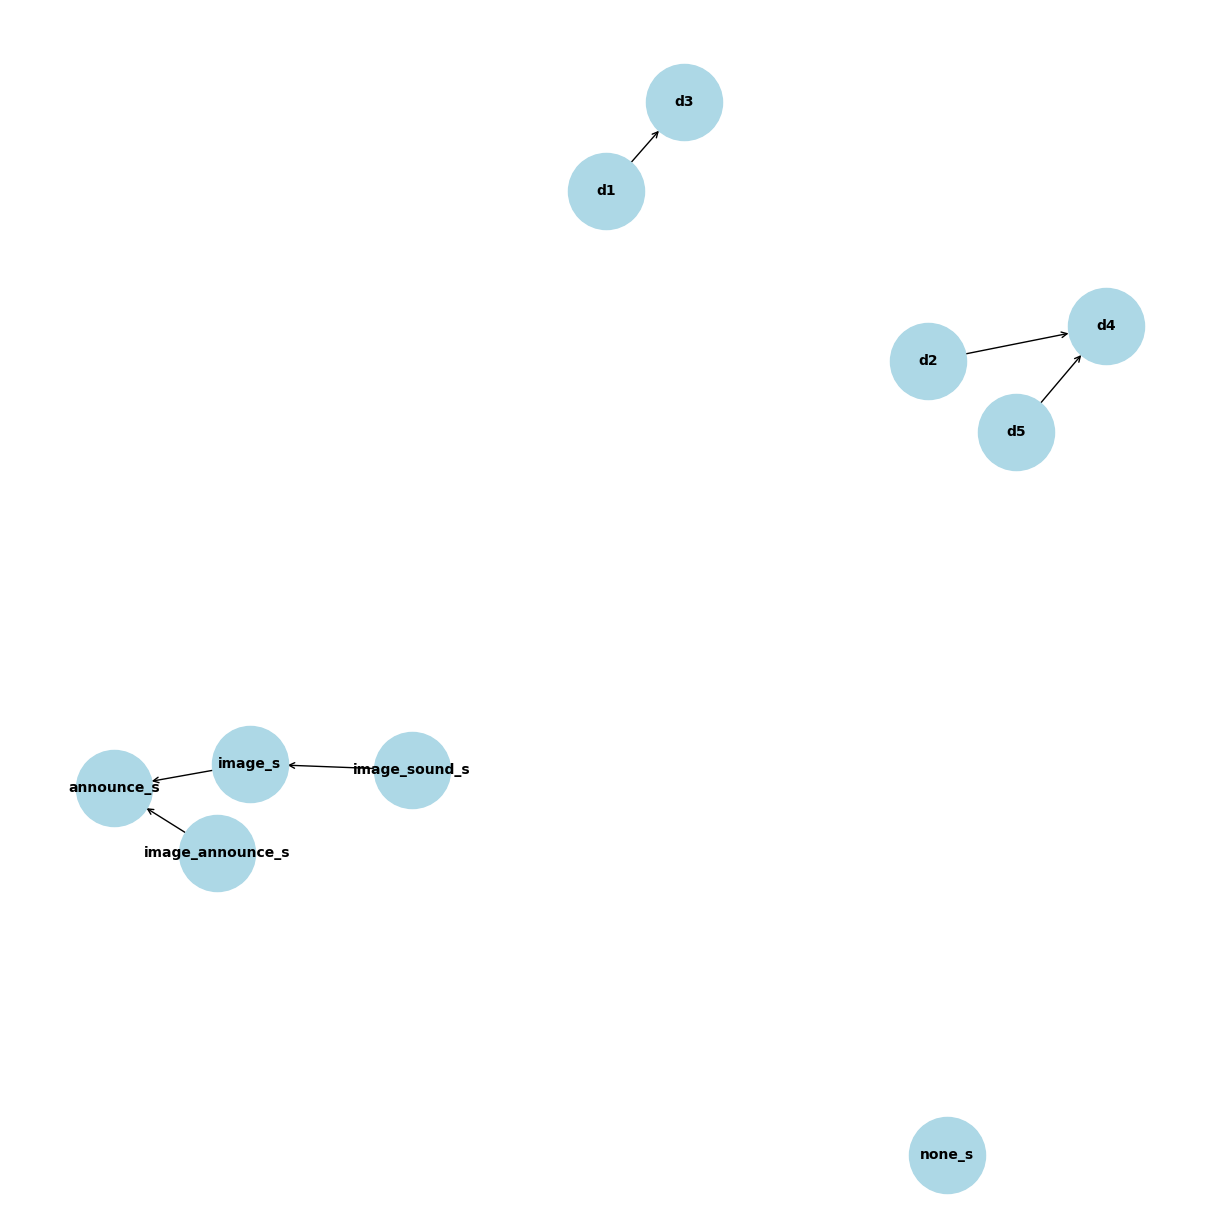

In [22]:
adj_matrix = model.adjacency_matrix_
threshold = 0.29
filtered_matrix = np.where(np.abs(adj_matrix) > threshold, adj_matrix, 0)

# Optionally, you can visualize the filtered adjacency matrix
def plot_adjacency_matrix(matrix, labels):
    G = nx.DiGraph(matrix)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, labels={i: labels[i] for i in range(len(labels))}, 
            node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', 
            arrows=True, arrowstyle='->', arrowsize=10, edge_color='black')
    plt.show()

# If df_std is a DataFrame, use its columns as labels
if isinstance(df_std, pd.DataFrame):
    labels = df_std.columns
else:
    labels = range(len(filtered_matrix))

plot_adjacency_matrix(filtered_matrix, labels)

In [23]:
%%time
# RCD
print(time.ctime())
model = lingam.RCD()
model.fit(df_std)
print(time.ctime())

# DAGを保存するなら実行
save_pickle = 'pickles'
os.makedirs(save_pickle, exist_ok=True)
#with open(save_pickle+'/model_RCD.pickle', mode='wb') as f:
#    pickle.dump(model, f)

Thu May 30 13:43:49 2024
Thu May 30 13:43:55 2024
CPU times: user 30.6 s, sys: 5.28 s, total: 35.9 s
Wall time: 6.09 s


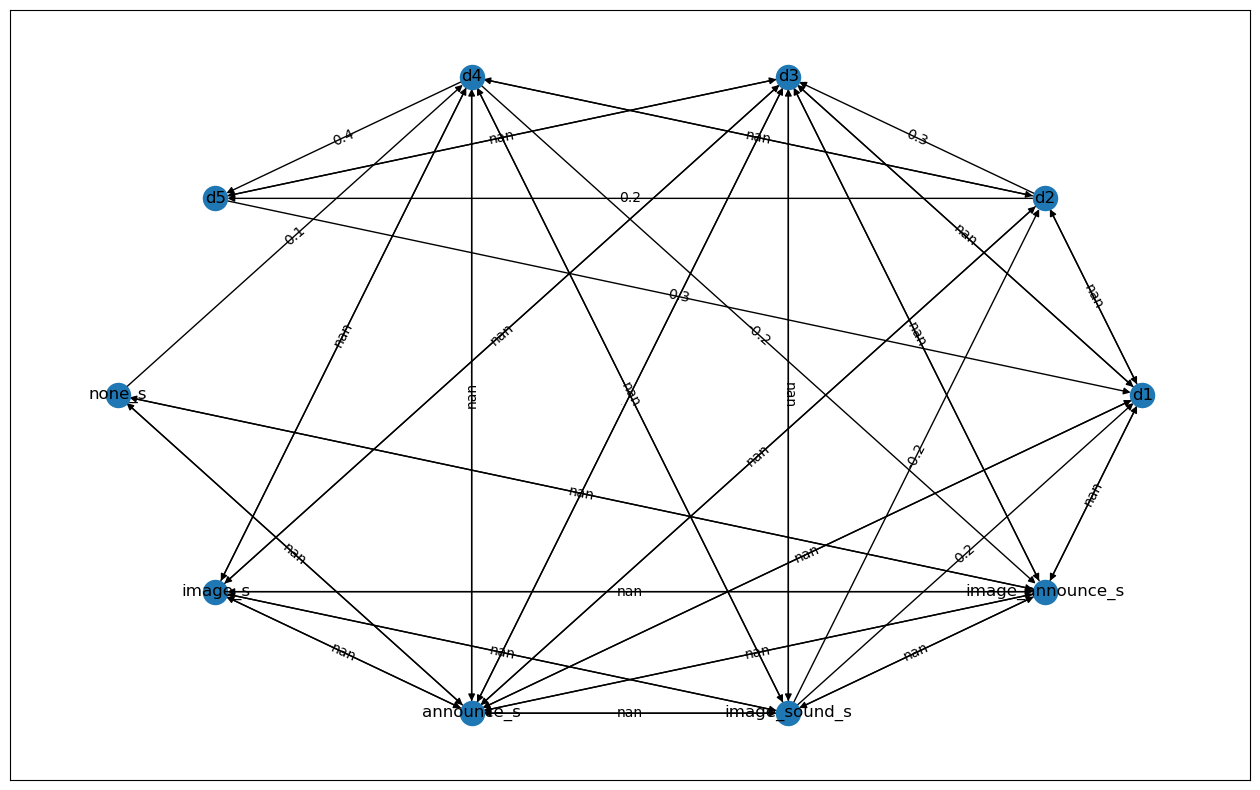

In [24]:
# 隣接行列を有向グラフで可視化(networkx使用)
#print(model.causal_order_)
#print(np.array(colsname)[model.causal_order_])
#print(model.adjacency_matrix_)

adjacency_ = pd.DataFrame(model.adjacency_matrix_, columns=colsname, index=colsname)
G=nx.from_pandas_adjacency(adjacency_.T, create_using=nx.DiGraph)  # 列が原因、行が結果なのでnetworkxでは転置の必要がある
plt.figure(figsize=(16,10))
#pos = nx.bipartite_layout(G, colsname[:5])
#pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
edge_labels = edge_labels = dict([((u,v,), f"{d['weight']:.1f}") for u,v,d in G.edges(data=True)])#nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw_networkx(G, pos)
plt.grid(False)
plt.show()

# 隣接行列を有向グラフで可視化(make_dot使用)
#make_dot(model.adjacency_matrix_, labels=colsname)

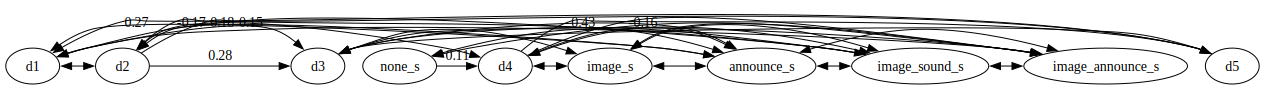

In [25]:
# 隣接行列を有向グラフで可視化(make_dot使用)
make_dot(model.adjacency_matrix_, labels=list(colsname))